# Homework


The homework is to prepare a report for the Ministry of Transport, revealing the nature and characteristics of flight delays. The report should help identify problem areas and contribute to decision-making. Therefore, strive not to state general facts, but to show problems. For example, the fact "the average departure delay is 15 minutes" by itself says little and does not help to understand why this is happening. On the contrary, a graph showing that on Mondays delays increase threefold compared to other days against the background of an increase in the number of flights and passengers suggests a possible cause of the problem: airports cannot cope with uneven load.

The report should be in the form of a notebook with a clear structure. At the beginning of the Markdown cell there is a brief description of the question under study (what we will study), then the code and all its outputs (tables, graphs, values), then again in the Markdown cell in which your brief conclusion is formulated.

The report should contain at least **5 results** confirmed by graphs. For variety of material, use different types of diagrams. All graphs should be provided with the necessary signatures (axis designations, title, color scheme legend).

To solve the problems, use the methods of the `pandas` library.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
flights = pd.read_csv('flights.csv', low_memory=False)
airports = pd.read_csv('airports.csv', low_memory=False)
airlines = pd.read_csv('airlines.csv', low_memory=False)
valid_airports = airports["IATA_CODE"].unique()
flights = flights[flights["ORIGIN_AIRPORT"].apply(lambda x : x in valid_airports)]
flights = flights.dropna(subset=["DEPARTURE_DELAY"])
flights[flights['DEPARTURE_DELAY'] < 0] = 0

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0


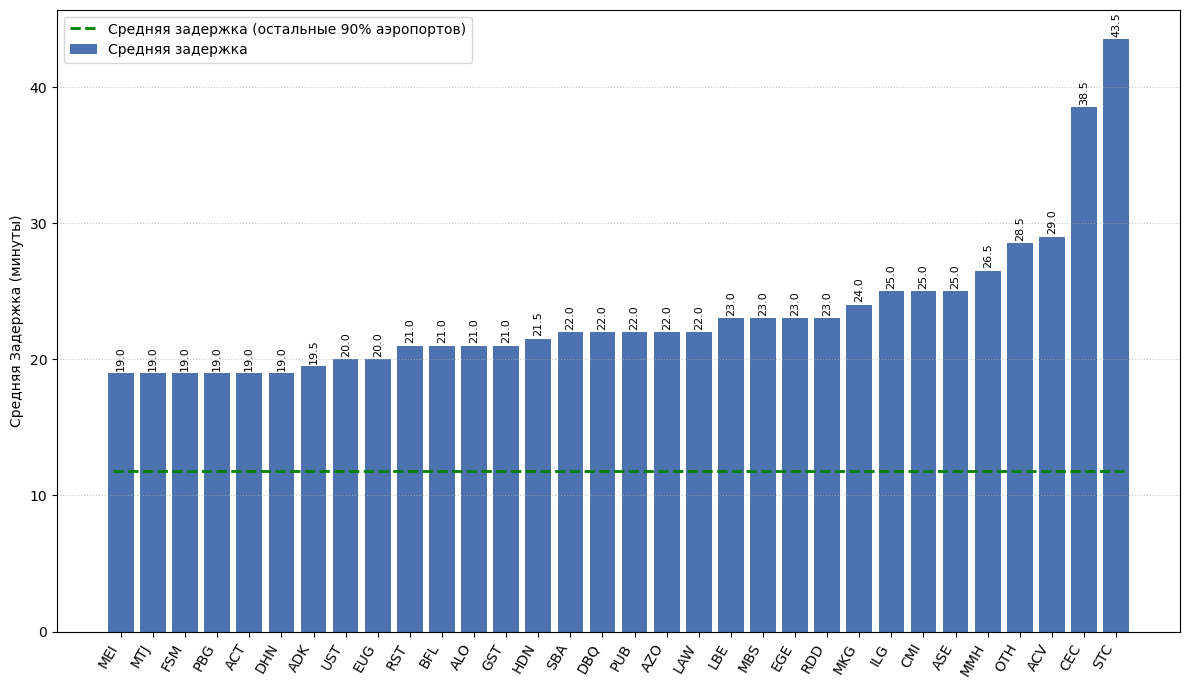

In [21]:
delay_by_airport = flights.groupby(["ORIGIN_AIRPORT"])["DEPARTURE_DELAY"].median()
delay_by_airport_last_10per = delay_by_airport.loc[delay_by_airport.sort_values()[-int(delay_by_airport.shape[0]*0.1):].index]
delay_by_airport_first_90per = delay_by_airport.loc[delay_by_airport.sort_values()[0:int(delay_by_airport.shape[0]*0.9):].index]
plt.figure(figsize=(12, 7))

bars = plt.bar(
    delay_by_airport_last_10per.index,
    delay_by_airport_last_10per,
    label="Средняя задержка",
    color="#4C72B0",

    width=0.8
)

plt.axhline(
    delay_by_airport_first_90per.mean(),
    xmin=0.05,
    xmax=0.95,
    color="green",
    linestyle="--",
    linewidth=2,
    label="Средняя задержка (остальные 90% аэропортов)"
)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.2,
        f'{height:.1f}',
        ha='center',
        va='bottom',
        fontsize=8,
        rotation=90
    )

plt.xticks(rotation=60, ha='right')
plt.ylabel("Средняя Задержка (минуты)")
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.tight_layout()
plt.legend()
plt.show()

TypeError: the dtypes of parameters x (object) and width (int64) are incompatible

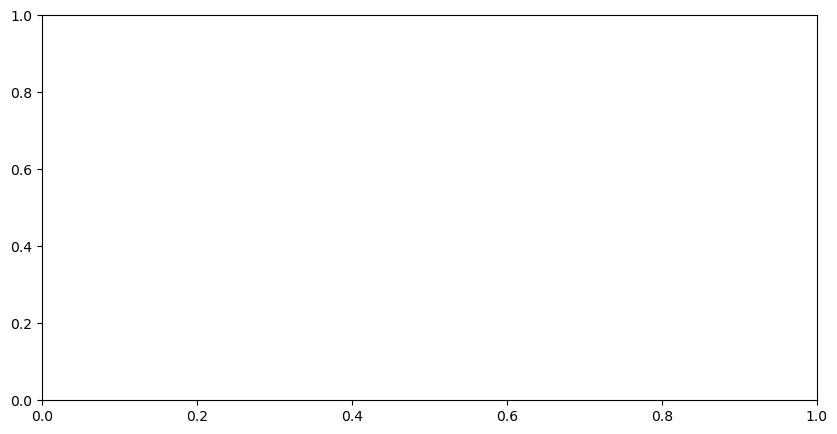

In [23]:

delay_by_line = flights.groupby("AIRLINE")["DEPARTURE_DELAY"].median().sort_values()

plt.figure(figsize=(10, 5))
bars = plt.bar(delay_by_line.index, delay_by_line, width=1)

mean_delay = delay_by_line.values.mean()
plt.axhline(mean_delay, color="red", lw=2, linestyle="--", label=f"Средняя медианная задержка ({mean_delay:.1f} мин)")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{height:.1f}", ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=60, ha='right')
plt.ylabel("Медианная задержка вылета (мин)")
plt.title("Медианные задержки вылетов по авиакомпаниям")
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.show()